In [3]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('winequality-red.csv')
df.shape

(1599, 12)

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [14]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(max_depth = 3)

In [34]:
df = df.sample(frac = 1).reset_index(drop= True)
df.shape

(1599, 12)

In [38]:
df_train = df.head(1000)
df_test = df.tail(599)

In [41]:
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar',
        'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH',
        'sulphates','alcohol']


In [42]:
clf.fit(df_train[cols],df_train['quality'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
train_predictors = clf.predict(df_train[cols])
test_predictors = clf.predict(df_test[cols])

In [44]:
train_accuracy = accuracy_score(df_train['quality'],train_predictors)
test_accuracy = accuracy_score(df_test['quality'],test_predictors)

In [50]:
print(np.round(train_accuracy,2))
print(np.round(test_accuracy,2))

0.63
0.52


In [51]:
train_err = 1- train_accuracy
train_err

0.374

In [52]:
test_err = 1- test_accuracy
test_err

0.4774624373956594

In [64]:
train_acc = []
test_acc = []
train_err = []
test_err = []
for i in range(1,26):
    clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(df_train[cols],df_train['quality'])
    train_predictors = clf.predict(df_train[cols])
    test_predictors = clf.predict(df_test[cols])
    train_accuracy = accuracy_score(df_train['quality'],train_predictors)
    train_error = 1- train_accuracy
    test_accuracy = accuracy_score(df_test['quality'],test_predictors)
    test_error = 1- test_accuracy
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    train_err.append(train_error)
    test_err.append(test_error)

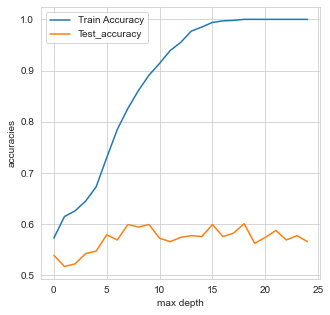

In [65]:
plt.figure(figsize = (5,5))
sns.set_style('whitegrid')
plt.plot(train_acc,label = 'Train Accuracy')
plt.plot(test_acc,label = 'Test_accuracy')
plt.xlabel('max depth')
plt.ylabel('accuracies')
plt.xticks(range(0,26,5))
plt.legend()
plt.show()

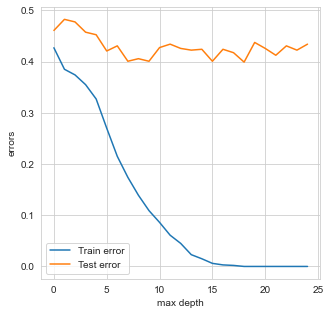

In [68]:
plt.figure(figsize = (5,5))
sns.set_style('whitegrid')
plt.plot(train_err,label = 'Train error')
plt.plot(test_err,label = 'Test error')
plt.xlabel('max depth')
plt.ylabel('errors')
plt.xticks(range(0,26,5))
plt.legend()
plt.show()

In [76]:
df = pd.read_csv('winequality-red.csv')
df.shape

(1599, 12)

In [81]:
df = pd.read_csv('winequality-red.csv')
df['kfold'] = -1
df= df.sample(frac = 1).reset_index(drop= True)
from sklearn.model_selection import StratifiedKFold 
kf = StratifiedKFold(n_splits = 5)
for fold,(trn_,val_) in enumerate(kf.split(X=df,y= df['quality'])):
    df.loc[val_,'kfold'] = fold
df.to_csv('train_folds.csv',index = False)

In [78]:
df = pd.read_csv('winequality-red.csv')
df['kfold'] = -1
df.loc[3,'kfold'] = 6 #-- adding value 6 to kfold column in sample 3

In [79]:
df.loc[3]

fixed acidity           11.200
volatile acidity         0.280
citric acid              0.560
residual sugar           1.900
chlorides                0.075
free sulfur dioxide     17.000
total sulfur dioxide    60.000
density                  0.998
pH                       3.160
sulphates                0.580
alcohol                  9.800
quality                  6.000
kfold                    6.000
Name: 3, dtype: float64

In [85]:
num_bins = int(1+np.floor(np.log2(len(df))))
num_bins

11

In [87]:
# divide data into bins

df.loc[:,'bins']= pd.cut(df['quality'],bins = num_bins,labels = False)
df['bins'].value_counts()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold,bins
0,9.4,0.340,0.37,2.2,0.075,5.0,13.0,0.99800,3.22,0.62,9.2,5,0,4
1,7.6,0.685,0.23,2.3,0.111,20.0,84.0,0.99640,3.21,0.61,9.3,5,0,4
2,6.8,0.640,0.03,2.3,0.075,14.0,31.0,0.99545,3.36,0.58,10.4,6,0,6
3,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5,0,4
4,10.6,0.360,0.60,2.2,0.152,7.0,18.0,0.99860,3.04,1.06,9.4,5,0,4


In [134]:
from sklearn.model_selection import StratifiedKFold

def create_folds(data):
    data['folds'] = -1
    data = data.sample(frac=1).reset_index(drop= True)
    num_bins = int(1+np.floor(np.log2(len(data))))
    data.loc[:,'bins'] = pd.cut(data['target'],bins = num_bins,labels = False)
    kf = StratifiedKFold(n_splits = 5)
    for fold, (tr_,val_) in enumerate(kf.split(X =data,y = data.bins.values)):
        data.loc[val_,'folds'] = fold
    return data
    

In [135]:
#create regression Dataset with 10000 samples, 100 features and 1 target

from sklearn.datasets import make_regression

x,y = make_regression(n_samples=10000,n_features = 100, n_targets = 1)
df = pd.DataFrame(x,columns = [f'f_{i}' for i in range(x.shape[1])] )
df.loc[:,'target'] = y
df.head()
df = create_folds(df)

In [143]:
df[['folds','bins']].head()

,folds,bins
0,0,6
1,0,4
2,0,7
3,0,4
4,0,4


In [104]:
#create regression Dataset with 10000 samples, 100 features and 1 target

from sklearn.datasets import make_classification

x,y = make_classification(n_samples=1000,n_features = 10, n_classes = 3,n_clusters_per_class = 1)
df = pd.DataFrame(x,columns = [f'f_{i}' for i in range(x.shape[1])] )
df.loc[:,'target'] = y
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,target
0,-0.126309,0.571602,0.757421,-1.575361,-1.183679,-0.762658,0.698588,-0.339858,1.318056,1.969008,2
1,2.663559,-0.287894,-1.450405,-0.728108,-0.195255,-0.155187,0.393869,0.350130,0.634230,0.958469,2
2,-1.959068,1.872806,-0.642554,-1.367300,-0.283243,0.822173,-0.743488,-0.393894,0.667790,0.788260,0
3,-0.884830,-0.194826,-1.048454,0.991340,1.134463,-0.464696,-0.652354,0.583285,-0.904477,-1.384166,1
4,-1.177540,-0.565917,-0.375626,-1.734152,0.227284,-0.655399,0.755594,1.150041,1.446181,2.158331,2


In [137]:
df['folds'].value_counts()

4    2000
3    2000
2    2000
1    2000
0    2000
Name: folds, dtype: int64